# Example 7.2 Coherence of a wind field

<center>
<img src="figures\Coherence_bridge.png" width="400">
</center>
The wind is modelled as three components: u,v and w. Let's consider the cross-correlation of the wind in two different points.

$$R_{u_1 u_2}(\tau)=\text{E}[ u_1(t) u_2(t+\tau)]$$.

We know that this can be interpreted in the frequency-domain as a cross-spectral density:

$$ S_{u_1 u_2}(\omega)=\dfrac{1}{2 \pi}
\int_{-\infty}^{\infty}
R_{u_1 u_2}(\tau) \exp({-i \omega \tau}) \: \text{d} \tau$$


We often assume that the wind field is homogeneous. This implies that ...

$\quad$ *i)* the statistical properties (mean, standard deviation, spectral density) are equal in all points:

$$ S_{u_1}(\omega)=S_{u_2}(\omega)=S_{u}(\omega)$$

$\quad$ *ii)* the cross-correlation only depends on the spatial separation between the two points $\Delta x=|x_1-x_2|$ (and not their absolute coordinates $x_1$ and $x_2$):

$$R_{u_1 u_2}(\tau)=R_{u}(\tau,\Delta x)$$

$$ S_{u_1 u_2}(\omega)= S_u(\omega,\Delta x)=
\dfrac{1}{2 \pi}
\int_{-\infty}^{\infty}
R_{u}(\tau,\Delta x) \exp({-i \omega \tau}) \: \text{d} \tau$$

The cross-spectral density can be expressed by the normalized co-spectrum $\hat{\text{Co}}(\omega,\Delta x)$: 

$$ S_u(\omega,\Delta x)=
\sqrt{S_{u_1}(\omega) S_{u_2}(\omega)}\hat{\text{Co}}(\omega,\Delta x)
=S_u(\omega)\hat{\text{Co}}(\omega,\Delta x)$$

This means that the cross-spectral density matrix of the two components $u_1$ and $u_2$ can be written as follows:

$$
\mathbf{S}_u(\omega) = 
\left[ \begin{array}{c c c}
\mathbf{S}_{u_1}(\omega) & \mathbf{S}_{u_1 u_2}(\omega) \\
\mathbf{S}_{u_2 u_1}(\omega) & \mathbf{S}_{u_1}(\omega)
\end{array} \right]
=
\left[ \begin{array}{c c c}
\mathbf{S}_{u}(\omega) & \mathbf{S}_{u}(\omega)\hat{\text{Co}}(\omega,\Delta x) \\
\mathbf{S}_{u}(\omega)\hat{\text{Co}}(\omega,\Delta x) & \mathbf{S}_{u}(\omega)
\end{array} \right]
$$

Thus, $\hat{\text{Co}}(\omega,\Delta x)$ describes to what extent the wind turbulence is correlated with respect to frequency and separation.

An useful analogy to co-spectrum can be the correlation coefficient $\rho$ in the covariance matrix $\mathbf{\Sigma}$: 
$$
\mathbf{\Sigma} = 
\left[ \begin{array}{c c }
\sigma_1^2 & \sigma_{12} \\
\sigma_{21} & \sigma_{2}^2 \\
\end{array} \right]
=
\left[ \begin{array}{c c}
\sigma_1^2 & \rho_{12} \sqrt{\sigma_1^2 \sigma_2^2} \\
\rho_{21} \sqrt{\sigma_1^2 \sigma_2^2} & \sigma_{2}^2 \\
\end{array} \right]
$$



For natural wind we typically use a model on the form:

$$\hat{\text{Co}}(\omega,\Delta x)
=\exp(-K \frac{\Delta x \omega}{V})
$$

where $K$ is a constant and $V$ is the mean wind speed. This means that we have stronger correlation at lower frequencies and .

$\quad$ *i)* stronger correlation at lower frequencies

$\quad$ *ii)* stronger correlation between points that are close to each other

This can be explained by the turbulence consisting of vortices at several scales: big eddies with small frequency and small eddies with high frequency.



### Import and plot the wind data

The wind data from Bergsøysundet is imported from the text file. The two points of measurements are 44 m apart.

['t' 'u1' 'u2']


(0.0, 1800.0)

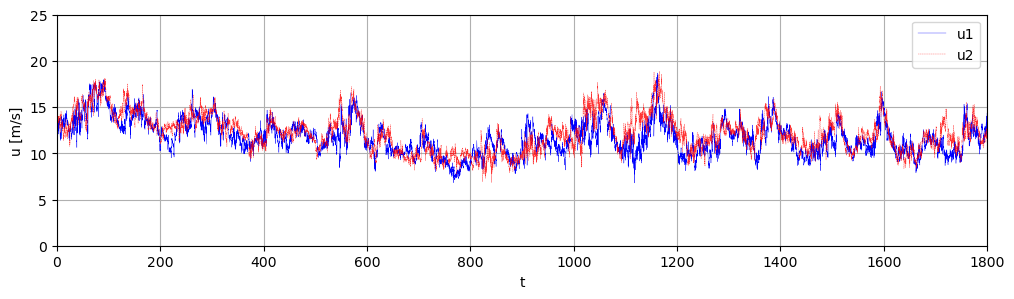

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import interpolate
from scipy import signal as spsi

# Import data
data_labels=np.loadtxt('data/wind_data_bergsoysund.txt',delimiter=',',skiprows=0, max_rows=1, dtype=str) 

print(data_labels)

data_wind=np.loadtxt('data/wind_data_bergsoysund.txt',delimiter=',',skiprows=1).T

t=data_wind[0,:]
u=data_wind[1:,:]

dt=t[1]-t[0]

plt.figure(figsize=(12,3))
plt.plot(t,u[0,:],'-',color='b',label='u1',linewidth=0.25)
plt.plot(t,u[1,:],'--',color='r',label='u2',alpha=0.8,linewidth=0.25)

plt.xlabel('t')
plt.ylabel('u [m/s]')
plt.xlim(0,1800)
plt.ylim(0,25)
plt.grid()
plt.legend()
plt.xlim(0,1800)


In [5]:
# Correlation matrix
Cu=np.corrcoef(u)
print(Cu)

[[1.         0.72630136]
 [0.72630136 1.        ]]


### Spectral densities and coherence

We estimate the cross-spectral densities using the Welch method.

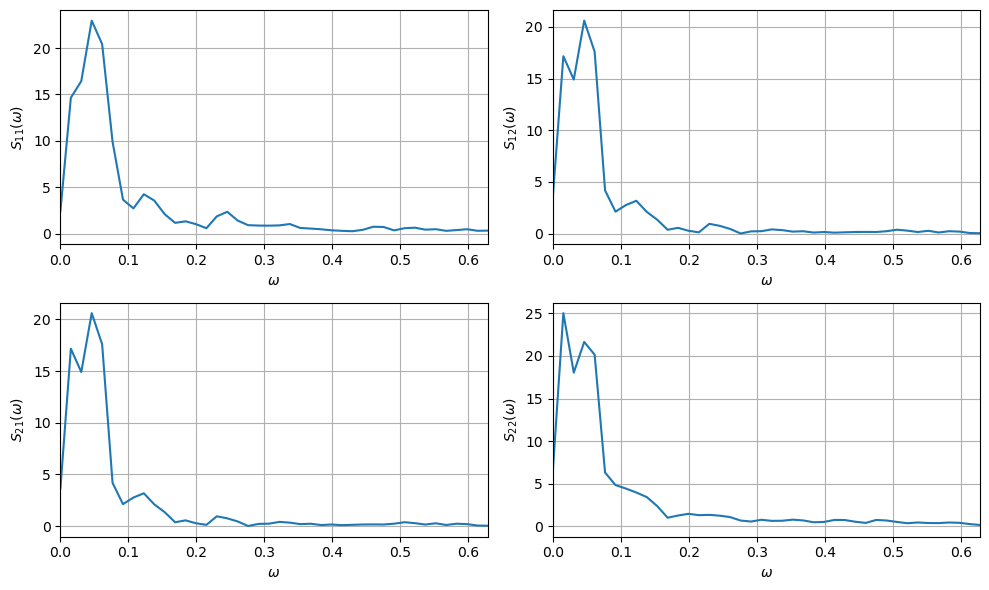

In [13]:
# Welch estimate of cross-spectral density

import scipy

Ndivisions=5 # Number of divisions of the time series
Nwindow=np.ceil(len(t)/Ndivisions) # Length of window
Nfft_pow2 = 2**(np.ceil(np.log2(Nwindow))) # Next power of 2

# Spectral matrix
S_welch=np.zeros((2,2,np.int32(Nfft_pow2/2+1)),dtype=np.complex_)

# Fill spectral matrix by taking the cross spectral density between each of the 3 time series
for k1 in range(2):
    for k2 in range(2):
            f, S_Hz=scipy.signal.csd(u[k1,:],u[k2,:], fs=1/dt, window='hann', nperseg=Nwindow, noverlap=None, nfft=Nfft_pow2, detrend='constant', return_onesided=True, scaling='density', axis=-1, average='mean')
            
            omega_welch=f*2*np.pi # Frequency axis in rad/s
            S_welch[k1,k2,:]=S_Hz/(2*np.pi) # Spectrum in rad/s

# Plot spectrum
fig, axs = plt.subplots(2,2,figsize=(10,6))    
for k1 in range(2):
    for k2 in range(2):
        ax = axs[k1,k2]
        
        # Plot cross-spectrum normalized by auto-spectrums (aka. coherence)
        ax.plot(omega_welch,np.abs(S_welch[k1,k2,:])) 
        
        ax.set_ylabel(('$S_{' + str(k1+1) + str(k2+1) + '}(\omega)$'))
        ax.set_xlabel('$\omega$')
        ax.grid(True)
        #ax.set_yscale('log')
        ax.set_xlim(0,0.1*2*np.pi)
plt.tight_layout()

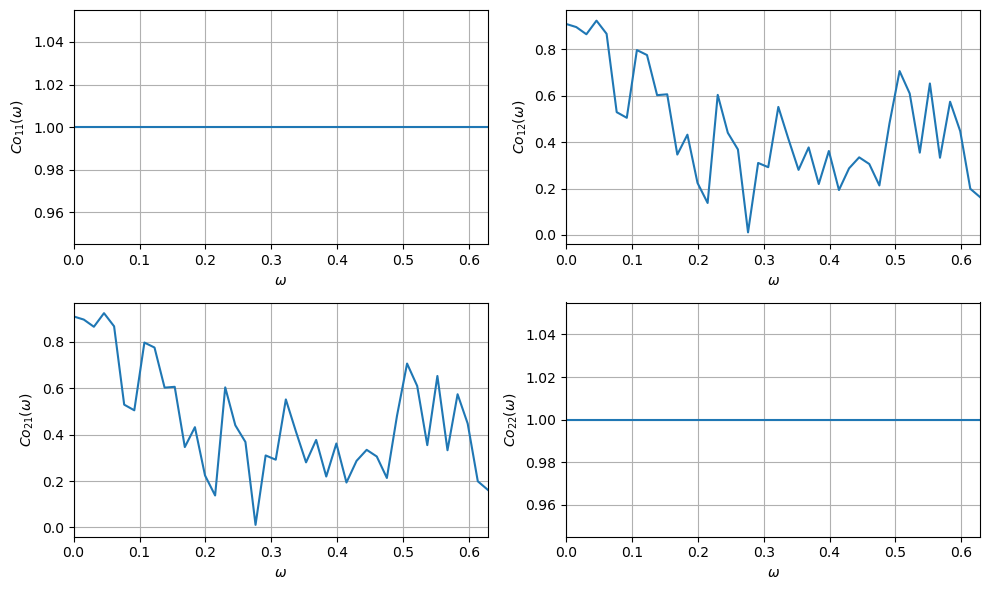

In [12]:


# Plot coherence
fig, axs = plt.subplots(2,2,figsize=(10,6))    
for k1 in range(2):
    for k2 in range(2):
        ax = axs[k1,k2]
        
        # Plot cross-spectrum normalized by auto-spectrums (aka. coherence)
        ax.plot(omega_welch,np.abs(S_welch[k1,k2,:]) /np.sqrt(S_welch[k1,k1,:]*S_welch[k2,k2,:]) )
        
        ax.set_ylabel(('$Co_{' + str(k1+1) + str(k2+1) + '}(\omega)$'))
        ax.set_xlabel('$\omega$')
        ax.grid(True)
        #ax.set_yscale('log')
        ax.set_xlim(0,0.1*2*np.pi)
plt.tight_layout()


The co-spectrums generally decay with higher frequency. In addition, the correlation is weaker for longer separations. Consider $Co_{21}$; it it slightly stronger than $Co_{31}$. However, estimations based on measured data does introduce some uncertainties.